**линейный классификатор**

правило Хэбба

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split

---

In [2]:
# загружаем даные
data = [
    np.loadtxt('../data/200_2b/points_1.txt'),
    np.loadtxt('../data/200_2b/points_2.txt')
]

In [3]:
# собираем вместе
X = np.vstack(data)

In [4]:
# метки классов
y = [ [i]*data[i].shape[0] for i in range(len(data)) ]
y = np.asarray(sum(y,[]))
y = y*2-1

In [5]:
X.shape, y.shape

((200, 2), (200,))

In [6]:
%xdel data

In [7]:
# нормируем данные
X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

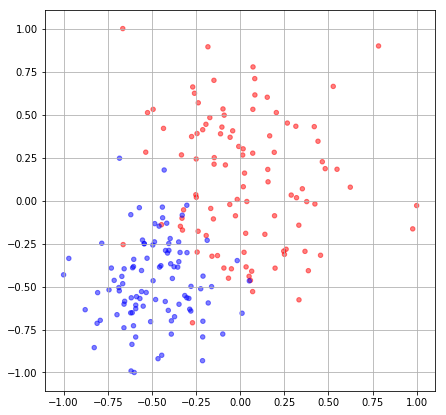

In [8]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [9]:
Xp = np.hstack([np.ones([X.shape[0],1]),X])
Xp.shape

(200, 3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xp,y,test_size=0.8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40, 3), (40,), (160, 3), (160,))

In [11]:
%xdel Xp
%xdel X
%xdel y
# %xdel data

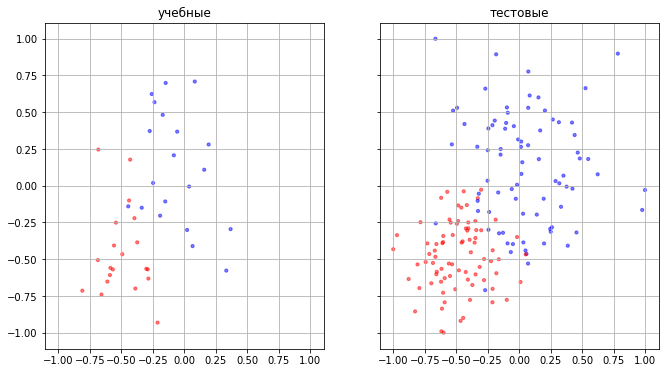

In [12]:
f, axarr = plt.subplots(1,2, sharey=True, sharex=True, figsize=(11,6),)
    
axarr[0].set_title('учебные')
axarr[0].scatter( x=X_train[:,1], 
                  y=X_train[:,2], 
                  c=[['b','r','g','y'][int(j>0)] for j in y_train ],  
                  s=10,
                  alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('тестовые')
axarr[1].scatter( x=X_test[:,1], 
                  y=X_test[:,2], 
                  c=[ ['b','r','g','y'][int(j>0)] for j in y_test],
                  s=10,
                  alpha=0.5 )
axarr[1].grid()

plt.show()

---

In [13]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=X_train.shape[1])
W 

array([ 0.00503502, -0.0992785 ,  0.04468904])

---

In [14]:
def loss(x,w,y): return -x.dot(w)*y

In [15]:
MAX_ITER = 20 # максимальное число циклов обучения
# ERROR_BOUND = -Xp.shape[0]*0.99 # порог ошибки (количество ошибок)

ERROR_BOUND = -2.5

a = 0.7 # скорость обучения
l = 0.5 # темп "забывания"

er_hist = [] # история ошибки

In [18]:
q = loss(X_train,W,y_train).sum()
er_hist.append( q )

In [20]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):

    if stop: break

    for j in np.random.permutation(X_train.shape[0]):
        
        if er_hist[-1] < ERROR_BOUND: # проверяем достижение порога
            print( 'error bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break
            
        xj,yj = X_train[j,:],y_train[j]
                        
        r = np.sign( xj.dot(W) ) # выход
        
        if (r*yj)<0: W = W + a*xj.T.dot(y_train[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        er_hist.append( q )     
        


In [21]:
print(W)
print(len(er_hist),er_hist[-1])

[-1.39496498 -3.54024953 -1.04041888]
809 -0.6896385524605313


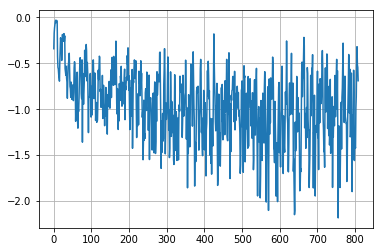

In [22]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [24]:
r = np.sign(X_test.dot(W)) 

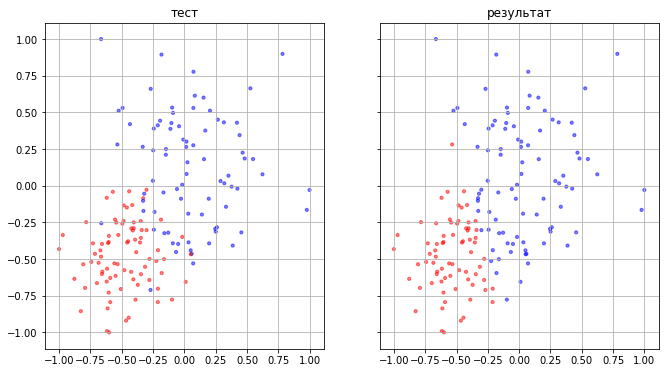

In [31]:
f, axarr = plt.subplots(1,2, sharey=True, sharex=True, figsize=(11,6),)
    
axarr[0].set_title('тест')
axarr[0].scatter( x=X_test[:,1], 
                  y=X_test[:,2], 
                  c=[ ['b','r','g','y'][int(j>0)] for j in y_test],
                  s=10,
                  alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат')
axarr[1].scatter( x=X_test[:,1], 
                  y=X_test[:,2], 
                  c=[['b','r','g','y'][int(j>0)] for j in r ],  
                  s=10,
                  alpha=0.5 )
axarr[1].grid()


plt.show()

---

In [42]:
# строим сетку и определяем значения скора классификатора во всех узлах

n=500 # количество разбиений сетки

xx,yy = np.meshgrid(
    np.linspace( X_test[:,1].min()-0.1, X_test[:,2].max()+0.1, n), 
    np.linspace( X_test[:,1].min()-0.1, X_test[:,2].max()+0.1, n)
) # узлы сетки

xx.shape, yy.shape

xy = np.vstack([xx.ravel(),yy.ravel() ]).T # разворачиваем сетку 
xy = np.hstack([np.ones([xy.shape[0],1]),xy])
xy.shape


(250000, 3)

In [43]:
rr = np.sign(xy.dot(W)).reshape(n,n) # вычисляем скор для каждого узла сетки

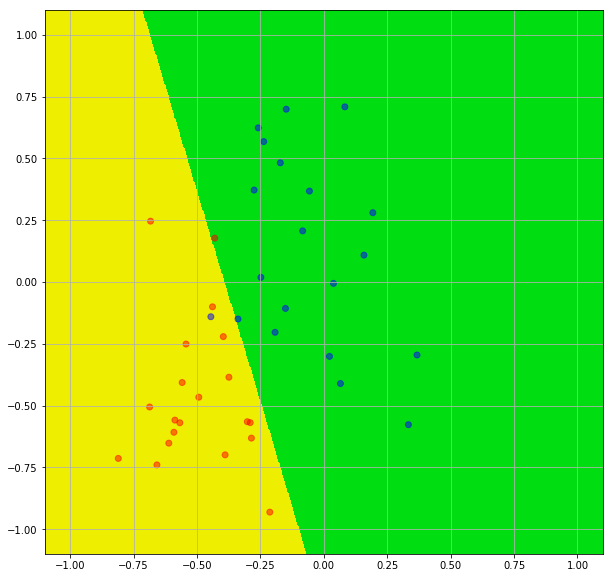

In [45]:
from matplotlib.colors import ListedColormap
cm=ListedColormap(['#00dd11','#eeee00'])

plt.figure(figsize=(10,10))

plt.contourf(xx, yy, rr, cmap=cm)

c = [ ['b','r'][ int(j>0.5) ] for j in y_train  ]
plt.scatter( x=X_train[:,1], y=X_train[:,2], c=c, alpha=.5 )

plt.grid()
plt.show()